In [3]:
#Time Series Forecasting with XGBoost#

In [60]:
#🔹 Problem Statement
Time series data often contains complex temporal dependencies, seasonal patterns, and noise, making accurate forecasting a challenging task. Traditional statistical methods such as ARIMA may not fully capture nonlinear relationships or interactions between multiple influencing factors.

In particular, when forecasting values such as energy demand, stock prices, sales, or solar energy production, it is important to use models that can learn from both historical patterns and engineered features.
XGBoost (Extreme Gradient Boosting), a powerful ensemble learning algorithm, has gained popularity due to its ability to handle large datasets, capture nonlinear relationships, and deliver high accuracy with relatively low computational cost.

The problem addressed in this project is:
How can we leverage XGBoost to effectively forecast future values in a time series, while capturing temporal trends and reducing forecasting errors compared to baseline models?##

SyntaxError: invalid syntax (2228194498.py, line 2)

In [21]:
#🔹 Goal of the Project

The goal of this project is to design, implement, and evaluate a time series forecasting model using XGBoost.

Specifically, the project aims to:

Preprocess and transform raw time series data into a supervised learning format suitable for XGBoost.

Engineer relevant features (lag features, rolling statistics, time-based features) to capture temporal dependencies and seasonality.

Train and optimize an XGBoost model for forecasting future values in the series.

Evaluate model performance using metrics such as MAE, RMSE, and MAPE, and compare results against traditional baselines (e.g., naive forecast, ARIMA).

Demonstrate forecasting capability by predicting future values over a chosen horizon (e.g., next 7 days, next 24 hours).

Ultimately, the project provides a robust machine learning approach for time series forecasting that can be adapted to domains such as energy production, demand forecasting, financial markets, and resource planning.#

SyntaxError: invalid syntax (4221471272.py, line 3)

In [27]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 3.0 MB/s eta 0:00:19
    --------------------------------------- 1.3/56.8 MB 3.2 MB/s eta 0:00:18
   - -------------------------------------- 2.1/56.8 MB 3.3 MB/s eta 0:00:17
   - -------------------------------------- 2.6/56.8 MB 3.0 MB/s eta 0:00:19
   -- ------------------------------------- 3.1/56.8 MB 3.1 MB/s eta 0:00:18
   -- ------------------------------------- 3.7/56.8 MB 2.9 MB/s eta 0:00:19
   -- ------------------------------------- 3.9/56.8 MB 2.7 MB/s eta 0:00:20
   -- ------------------------------------- 4.2/56.8 MB 2.6 MB/s eta 0:00:21
   --- ------------------------------------ 4.5/56.8 MB 2.4 MB/s eta 0:00:22
   --- ------------------------------------ 4.7/56.8 MB 2.3 MB/s eta 0:00:24
   --- ------------------------------------ 5.0/56.8 MB 2.2 MB/s eta 0:00:24
   --- ------

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [52]:
df = pd.read_csv(r"C:\Users\palguni\Downloads\AEP_hourly.csv.zip")
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

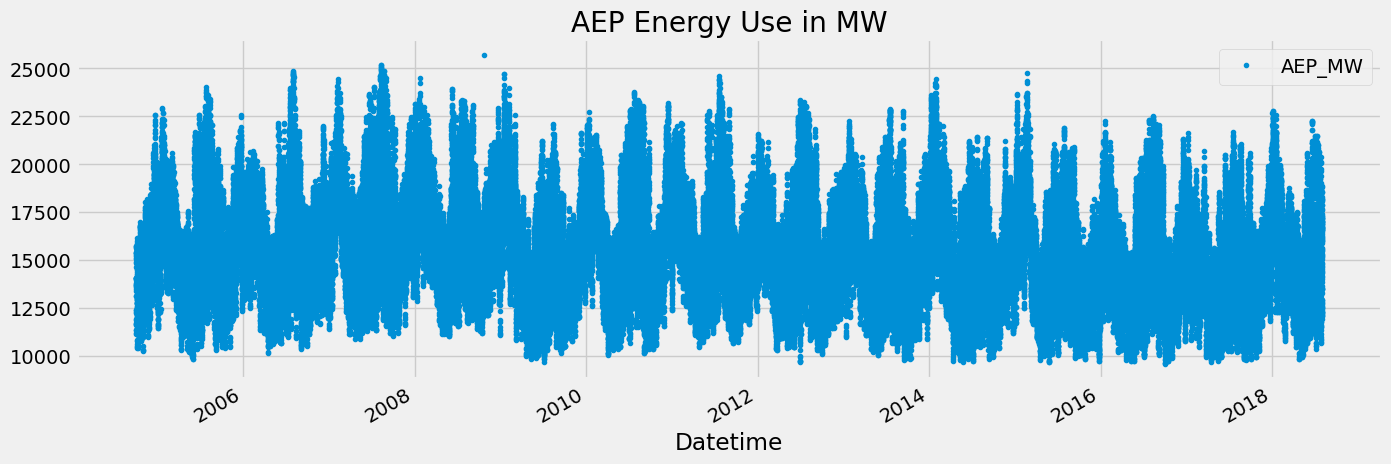

In [68]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='AEP Energy Use in MW')
plt.show()

In [42]:
print(df.columns)

Index(['AEP_MW'], dtype='object')


In [62]:
print(df.head)

<bound method NDFrame.head of                       AEP_MW
Datetime                    
2004-12-31 01:00:00  13478.0
2004-12-31 02:00:00  12865.0
2004-12-31 03:00:00  12577.0
2004-12-31 04:00:00  12517.0
2004-12-31 05:00:00  12670.0
...                      ...
2018-01-01 20:00:00  21089.0
2018-01-01 21:00:00  20999.0
2018-01-01 22:00:00  20820.0
2018-01-01 23:00:00  20415.0
2018-01-02 00:00:00  19993.0

[121273 rows x 1 columns]>


In [64]:
print(df.tail)

<bound method NDFrame.tail of                       AEP_MW
Datetime                    
2004-12-31 01:00:00  13478.0
2004-12-31 02:00:00  12865.0
2004-12-31 03:00:00  12577.0
2004-12-31 04:00:00  12517.0
2004-12-31 05:00:00  12670.0
...                      ...
2018-01-01 20:00:00  21089.0
2018-01-01 21:00:00  20999.0
2018-01-01 22:00:00  20820.0
2018-01-01 23:00:00  20415.0
2018-01-02 00:00:00  19993.0

[121273 rows x 1 columns]>


# 1. Outlier Analysis and removal

<Axes: ylabel='Frequency'>

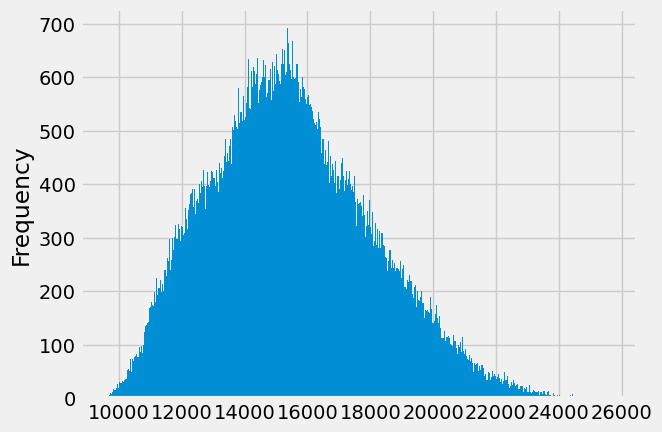

In [66]:
df['AEP_MW'].plot(kind='hist', bins=500)

<Axes: title={'center': 'Outliers'}, xlabel='Datetime'>

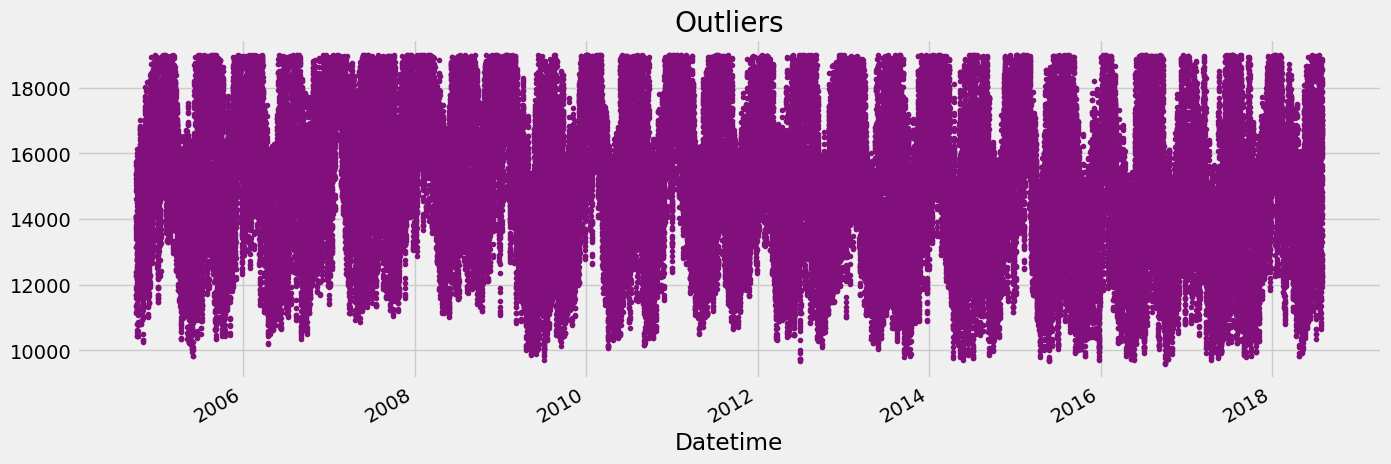

In [72]:
df.query('AEP_MW < 19_000')['AEP_MW'] \
    .plot(style='.',
          figsize=(15, 5),
          color=color_pal[5],
          title='Outliers')

In [74]:
df = df.query('AEP_MW > 19_000').copy()

# Reviewing: Train / Test Split

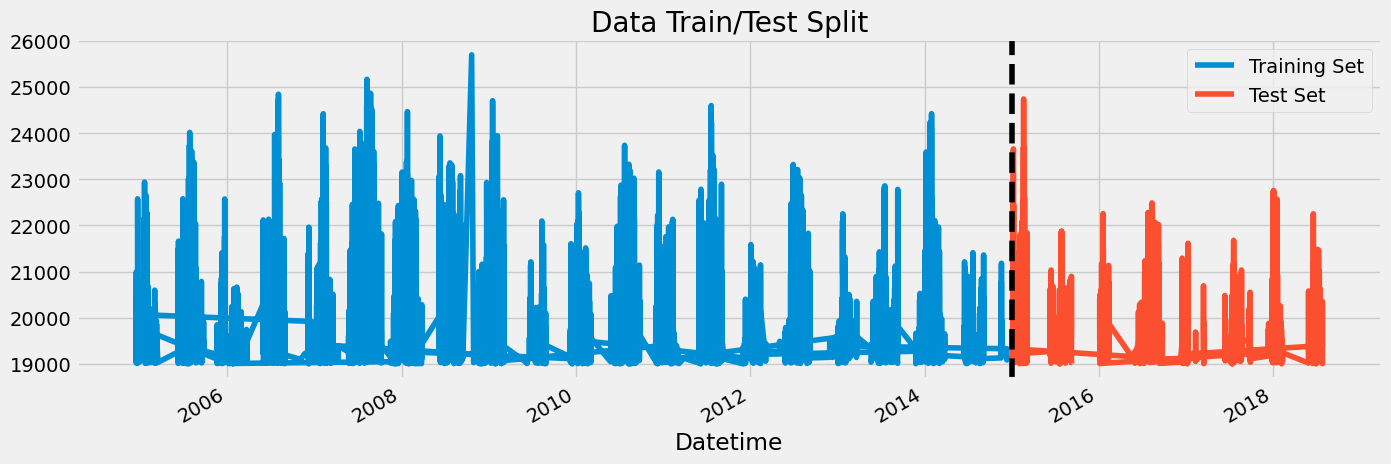

In [77]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()